In [86]:
# We would like to find out what anime to watch next, so we decided to take two CSVs files from Kaggle that rate anime on a range from 1-10
#1 being the least and 10 being the best

import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

ratings = "../ETLPROJECT/rating.csv"
anime = "../ETLPROJECT/anime.csv"
ratings_data = pd.read_csv(ratings)
anime_data = pd.read_csv(anime)

In [89]:
#merging csvs
anime_ratings = pd.merge(anime_data, ratings_data, how="inner", on = "anime_id")
anime_ratings

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [90]:
anime_ratings.dropna(how='any',inplace=True)
anime_ratings

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


In [91]:
anime_renamed = anime_ratings.rename(columns = {'rating_x':'anime_ratings','rating_y':'rating_rates'})

In [93]:
#grouping by type
anime_group = anime_renamed.groupby("type", sort=False)["user_id"].count()
anime_group

type
Movie      1051909
TV         5283596
OVA         800307
Special     559347
Music        26500
ONA          91952
Name: user_id, dtype: int64

In [94]:
#removing -1 from both ratings. -1 mean the user did not rate the anime.
tv_df = anime_renamed.loc[anime_renamed["rating_rates"] >= 1]


tv_df1 = tv_df.loc[tv_df["anime_ratings"] >= 1]

tv_df1

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6


In [95]:
#combined both ratings from CSVs to create one 
tv_df1['anime_mean'] = tv_df1[['rating_rates','anime_ratings']].mean(axis=1)
tv_df1

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates,anime_mean
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,7.185
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,9.685
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,9.685
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,9.685
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,9.685
...,...,...,...,...,...,...,...,...,...,...
7813713,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1,2.575
7813716,5543,Under World,Hentai,OVA,1,4.28,183,49503,4,4.140
7813717,5543,Under World,Hentai,OVA,1,4.28,183,58483,1,2.640
7813720,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6,5.440


In [96]:
# Filtering by  TV 
df = tv_df1.loc[tv_df1["type"] == 'TV']

df

,anime_id,name,genre,type,episodes,anime_ratings,members,user_id,rating_rates,anime_mean
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10,9.630
2200,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,10,10,9.630
2201,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,11,8,8.630
2202,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,12,9,9.130
2203,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,17,10,9.630
...,...,...,...,...,...,...,...,...,...,...
7689793,5234,Zettai Yareru Greece Shinwa,"Comedy, Ecchi",TV,13,6.22,284,67348,7,6.610
7689810,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,1822,6,6.235
7689811,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,25856,4,5.235
7689813,7808,Zukkoke Knight: Don De La Mancha,"Adventure, Comedy, Historical, Romance",TV,23,6.47,172,49127,6,6.235


In [97]:
#Top Ten TV Animes
df2 = df.groupby('name')['anime_mean'].mean().to_frame().reset_index().sort_values(by='anime_mean',ascending = False)
df2.head(10)

,name,anime_mean
840,Gintama°,9.349747
695,Fullmetal Alchemist: Brotherhood,9.291371
838,Gintama&#039;,9.216276
2554,Steins;Gate,9.215663
1098,Hunter x Hunter (2011),9.182293
931,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,9.160742
839,Gintama&#039;: Enchousen,9.156129
837,Gintama,9.138199
431,Clannad: After Story,9.112646
437,Code Geass: Hangyaku no Lelouch R2,9.019919


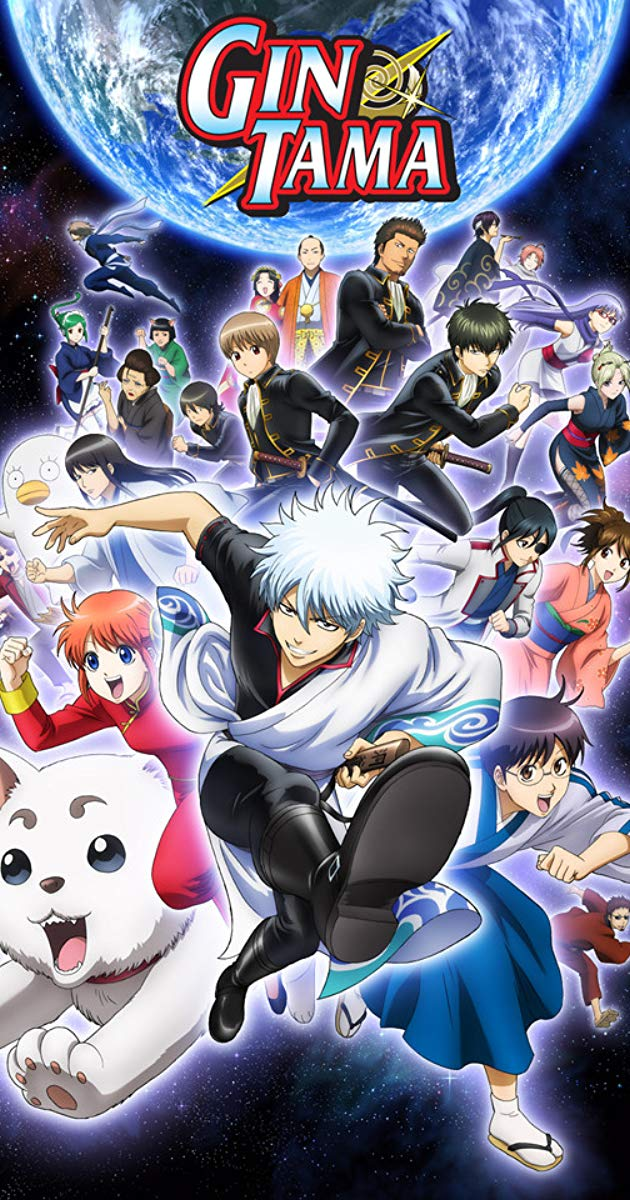

In [104]:
#Gintama is the top rated tv anime to watch by users
Image("../ETLPROJECT/images/gintama.png")

In [100]:
# The 10 least favorite tv anime series 
df3 = df.groupby('name')['anime_mean'].mean().to_frame().reset_index().sort_values(by='anime_mean',ascending = True)
df3.head(10)

,name,anime_mean
331,Burutabu-chan,3.000000
2843,Unko-san: Tsuiteru Hito ni Shika Mienai Yousei,3.125000
882,Great Hunt,3.375000
35,Agigongryong Doolie,3.410000
1382,"Kinyoru, Abe Reiji: Heikinteki na Salaryman no...",3.570000
18,AWOL,3.665000
2868,Vampire Holmes,3.908985
1068,Hitotsuboshi-ke no Ultra Baasan,3.940000
2105,Pichiko Dakyuubu,4.000000
2951,Yakyuubu Aruaru,4.000000


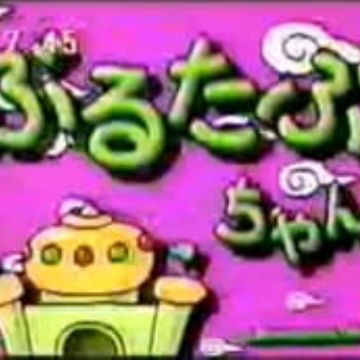

In [105]:
# Burutabu Chan is the least favorite anime rated by users
Image("../ETLPROJECT/images/burutabu_chan.png")